# Boston Housing Price Prediction with Linear Regression

Julia A. Moffit, PhD

-------------------------------
## Problem Statement
-------------------------------
The following project was designed to hone and leverage linear regression models in order to evaluate features that impact valuation of real estate properties.  Techniques of data preprocessing and linear regression modeling were utilized. Although the data set utilized in this analysis is outdated, it can serve as an approach to evaluate similar data structures in more recent data sets.

----------------------------
## Data Information
---------------------------

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- **CRIM:**     per capita crime rate by town
- **ZN:**       proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:**    proportion of non-retail business acres per town
- **CHAS:**     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:**      nitric oxides concentration (parts per 10 million)
- **RM:**       average number of rooms per dwelling
- **AGE:**     proportion of owner-occupied units built before 1940
- **DIS:**      weighted distances to five Boston employment centers
- **RAD:**      index of accessibility to radial highways
- **TAX:**      full-value property-tax rate per 10,000 dollars
- **PTRATIO:**  pupil-teacher ratio by town
- **LSTAT:**    %Socioeconomic status of the population
- **MEDV:**     Median value of owner-occupied homes in 1000 dollars

### Importing required libraries

In [2]:
# import libraries for data manipulation
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

# import library for preparing data
from sklearn.model_selection import train_test_split

# import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

### Read the dataset

In [3]:
df = pd.read_csv("Boston.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


**Observations**
* The price of the house indicated by the variable MEDV is the target variable and the rest are the independent variables based on which we will predict house price.

### Information about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


**Observations**
* There are a total of 506 non-null observations in each of the columns. This indicates that there are no missing values in the data.

* Every column in this dataset is numeric in nature.

### Obtain summary statistics of the dataset

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


**Observations:**
* The variability in some of the parameters is high due the standard deviation being equal to or larger than the mean.  This is further supported in the wide spread between min and max in these variables.  These could have outliers. These include:
    * CRIM: Crime rate
    * ZN: Proportion of residental land zoned for lots >25k sq ft
    * CHAS: Charles river adjacency
    * RAD: Index of accessibility to radial highways
* CHAS - the Charles River adjacency variable appears to be categorical - coded for numeric
* Although all variables are numeric, from the descriptive data you can discern which variables are discrete vs. continuous due to whole numbers shown in min,max and quartiles.  Likely discrete variables include:
    * RAD: Index of accessibility to radial highways

### Univariate Analysis

### Checking the distribution of the variables

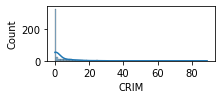

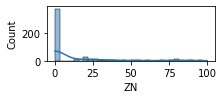

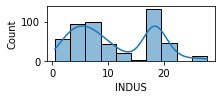

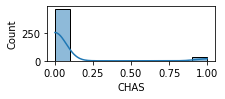

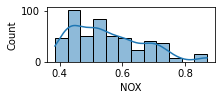

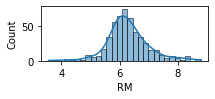

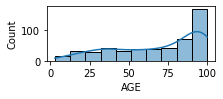

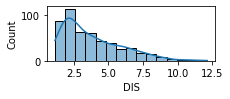

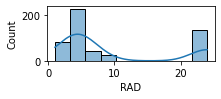

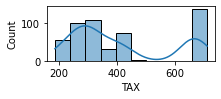

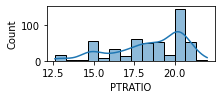

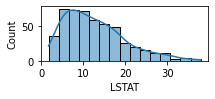

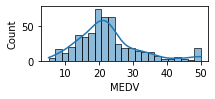

In [5]:
# visulization of variable distributions
for i in df.columns:
    plt.figure(figsize=(3, 1))
    sns.histplot(data=df, x=i, kde = True)
    plt.show()

**Observations**
* **The variables CRIM and ZN are positively skewed.** This suggests that most of the areas have lower crime rates and most residential plots are under the area of 25,000 sq. ft.
* **The variable CHAS, with only 2 possible values 0 and 1, follows a binomial distribution**, and the majority of the houses are away from Charles river (CHAS = 0).
* The distribution of the variable AGE suggests that many of the owner-occupied houses were built before 1940. 
* **The variable DIS** (average distances to five Boston employment centers) **has a nearly exponential distribution**, which indicates that most of the houses are closer to these employment centers.
* **The variables TAX and RAD have a bimodal distribution.**, indicating that the tax rate is possibly higher for some properties which have a high index of accessibility to radial highways.  
* The dependent variable MEDV seems to be slightly right skewed.

As the dependent variable is sightly skewed, application of a **log transformation on the 'MEDV' column** will be performed and the resultant distribution of the transformed column will be checked.

In [6]:
df['MEDV_log'] = np.log(df['MEDV'])

<AxesSubplot:xlabel='MEDV_log', ylabel='Count'>

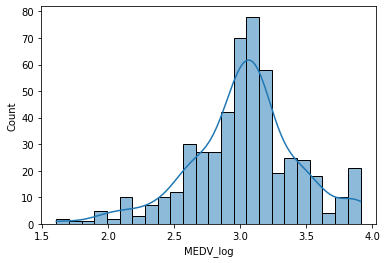

In [7]:
sns.histplot(data=df, x='MEDV_log', kde = True)

**Observations**
* The log-transformed variable (**MEDV_log**) appears to have a **nearly normal distribution without skew**, and hence we can proceed.

### Bivariate Analysis

#### Correlation analysis using a heatmap

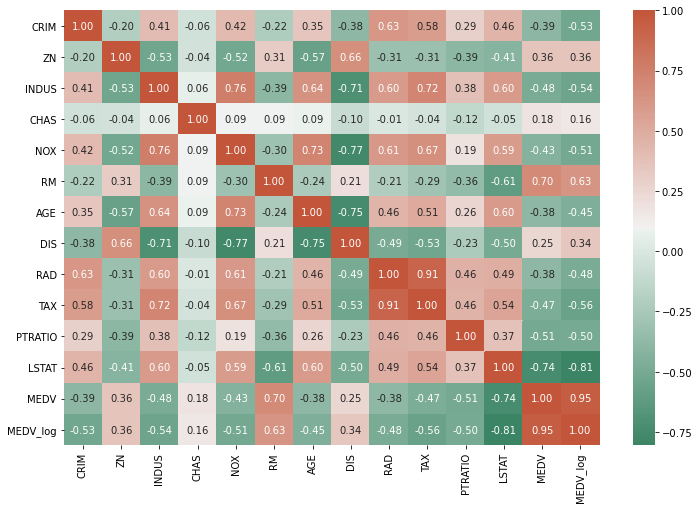

In [8]:
plt.figure(figsize=(12,8))
cmap = sns.diverging_palette(150, 20, as_cmap=True)
sns.heatmap(df.corr(), annot=True,fmt='.2f',cmap=cmap ) #write your code here
plt.show()

**Observations:**
* Significant correlations r > 0.7) are as follows:
    * Areas with more indsutrial areas were associated with a greater property tax rate (r = 0.72).
    * These industrial areas were negatively correlated with the weighted distance to Boston employment centers meaning these industrial areas were likely in close approximation to the employment centers (r= -.71).
    * Industrial areas were significantly associated a nitric oxide concentration - these are essentially photochemical smog. (r=0.76) 
    * Nitric oxides (smog) was positively associated with the age of the property (r=0.73) and inversely related to the distance to Boston employment centers - meaning they were close by (r=-0.75).  
    * Properties with a higher number of bedrooms per dwelling was significantly associated with a higher median value of the home (target), which is logical and expected. (r=0.70)
    * Older properties were assicated with being closer to employment centers as distance to these centers was negatively associated with age of the property (0.-75).
    * Radial highway accessibility was highly, and significantly correlated with the property tax rate (r=0.91).  
    * LSAT - the index of lower socioeconomic status, was signiicantly and negatively associated with the log median value of the properties (r=-0.81 (log)) value.  
    * MEDV and MEDV_log were highly correlated - which is expected, however we will only use log transformed variable for our analysis.  
* Overall analysis shows that some multi-colinearity may exist which will have to be dealt with.
* There are a number of important predictor variables to consider in the regression: INDUS, NOX, RM, AGE, RAD, LSAT. 

### Visualizing the relationship between the features having significant correlations (> 0.7) 

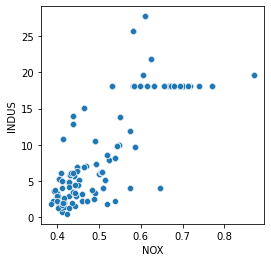

In [10]:
# scatterplot to visualize the relationship between NOX and INDUS
plt.figure(figsize=(4, 4))
sns.scatterplot(x='NOX', y='INDUS', data=df)#write you code here
plt.show()

**Observations:**
* Largely the relationship between environmental pollution (NOX: nitric oxides (smog)) and industrial properties is linear, however visual inspection indicates greater variation in the relationship between these variables at higher levels of NOX.  This indicates this may violate the assumption of homoscedasticity.  

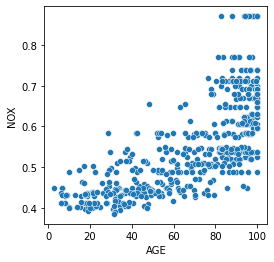

In [11]:
# scatterplot to visualize the relationship between AGE and NOX
plt.figure(figsize=(4, 4))
sns.scatterplot(x='AGE', y='NOX', data=df) #Write your code here
plt.show()

**Observations:____**

* The relationship between the age of the properties and smog is more of a logrhythmic function - at the highest levels of aged property propoportions, the NOX value increases precipitously.  These values may need log transformation. 

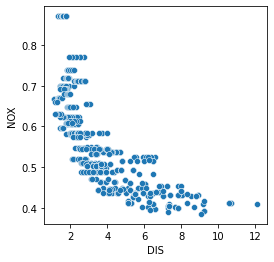

In [12]:
# scatterplot to visualize the relationship between DIS and NOX
plt.figure(figsize=(4, 4))
sns.scatterplot(x='DIS', y='NOX', data=df)#Write your code here
plt.show()

**Observations:**

* As the distance to employment centers increases, the environmental nitric oxides (smog) decreases, however this relationship is not linear.  Although significantly correlated follows more of an inverse variation function.  This makes sense as the concentrations of toxins decay in an inverse variation function as they diffuse across distances. These data should be log transformed. 

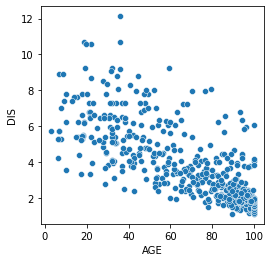

In [13]:
# scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize=(4, 4))
sns.scatterplot(x = 'AGE', y = 'DIS', data = df)
plt.show()

**Observations:**
* The distance of the houses to the Boston employment centers appears to decrease moderately as the the proportion of the old houses increase in the town. It is possible that the Boston employment centers are located in the established towns where proportion of owner-occupied units built prior to 1940 is comparatively high.

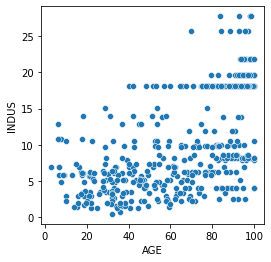

In [14]:
# scatterplot to visualize the relationship between AGE and INDUS
plt.figure(figsize=(4, 4))
sns.scatterplot(x = 'AGE', y = 'INDUS', data = df)
plt.show()

**Observations:**
* No trend between the two variables is observed in the above plot.

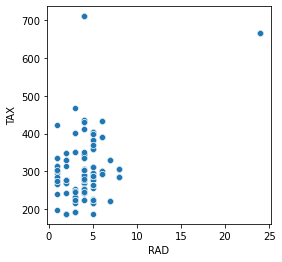

In [15]:
# scatterplot to visulaize the relationship between RAD and TAX
plt.figure(figsize=(4, 4))
sns.scatterplot(x = 'RAD', y = 'TAX', data = df)
plt.show()

**Observations:**
* The correlation between RAD and TAX is very high. But, no trend is visible between the two variables. 
This might be due to outliers. 

Correlation check after removing the outliers.

In [16]:
# remove the data corresponding to high tax rate
df1 = df[df['TAX'] < 600]
# import the required function
from scipy.stats import pearsonr
# calculate the correlation
print('The correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

The correlation between TAX and RAD is 0.24975731331429196


The high correlation between TAX and RAD is due to the outliers. The tax rate for some properties might be higher due to some other reason.

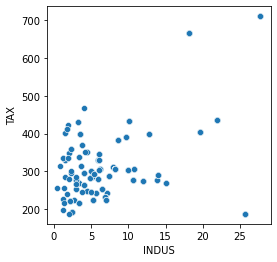

In [18]:
# scatterplot to visualize the relationship between INDUS and TAX
plt.figure(figsize=(4, 4))
sns.scatterplot(x = 'INDUS', y = 'TAX', data = df)
plt.show()

**Observations:**
* The tax rate appears to increase with an increase in the proportion of non-retail business acres per town. This might be due to the reason that the variables TAX and INDUS are related with a third variable.

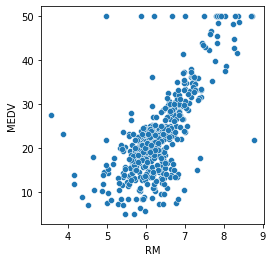

In [20]:
# scatterplot to visulaize the relationship between RM and MEDV
plt.figure(figsize=(4, 4))
sns.scatterplot(x = 'RM', y = 'MEDV', data = df)
plt.show()

**Observations:**
* The price of the house seems to increase as the value of RM increases. This is expected as the price is generally higher for more rooms.

* There are a few outliers in a horizontal line as the MEDV value seems to be capped at 50.

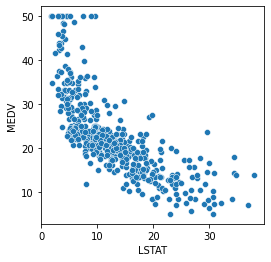

In [21]:
# scatterplot to visulaize the relationship between LSTAT and MEDV
plt.figure(figsize=(4, 4))
sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = df)
plt.show()

**Observations:**
* The price of the house tends to decrease with an increase in LSTAT. This is also possible as the house price is lower in areas where lower status people live.
* There are few outliers and the data seems to be capped at 50.

It has been observed that the variables LSTAT and RM have a linear relationship with the dependent variable MEDV. Also, there are significant relationships among a few independent variables, which is not desirable for a linear regression model. Let's first split the dataset.

### Split the dataset
Splitting the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test set.

In [22]:
# separate the dependent and independent variable
df.reset_index(drop = True)

Y = df['MEDV_log']
X = df.drop(columns = {'MEDV', 'MEDV_log'})

# add the intercept term
X = sm.add_constant(X)

In [23]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [24]:
X_train

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
13,1.0,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,8.26
61,1.0,0.17171,25.0,5.13,0,0.453,5.966,93.4,6.8185,8,284,19.7,14.44
377,1.0,9.82349,0.0,18.10,0,0.671,6.794,98.8,1.3580,24,666,20.2,21.24
39,1.0,0.02763,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,252,18.3,4.32
365,1.0,4.55587,0.0,18.10,0,0.718,3.561,87.9,1.6132,24,666,20.2,7.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,1.0,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315,16.4,9.25
72,1.0,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,5.52
396,1.0,5.87205,0.0,18.10,0,0.693,6.405,96.0,1.6768,24,666,20.2,19.37
235,1.0,0.33045,0.0,6.20,0,0.507,6.086,61.5,3.6519,8,307,17.4,10.88


Next, a check for multicollinearity in the train dataset will be performed.

### Check for Multicollinearity

The Variance Inflation Factor (VIF), is used to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped/treated till all the features have a VIF score < 5

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

    feature         VIF
0     const  535.372593
1      CRIM    1.924114
2        ZN    2.743574
3     INDUS    3.999538
4      CHAS    1.076564
5       NOX    4.396157
6        RM    1.860950
7       AGE    3.150170
8       DIS    4.355469
9       RAD    8.345247
10      TAX   10.191941
11  PTRATIO    1.943409
12    LSTAT    2.861881


**Observations:**
* There are two variables with a high VIF - RAD and TAX. TAX is removed as it has the highest VIF values and a subsequent check for multicollinearity will be performed again.

In [26]:
X_train

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
13,1.0,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,8.26
61,1.0,0.17171,25.0,5.13,0,0.453,5.966,93.4,6.8185,8,284,19.7,14.44
377,1.0,9.82349,0.0,18.10,0,0.671,6.794,98.8,1.3580,24,666,20.2,21.24
39,1.0,0.02763,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,252,18.3,4.32
365,1.0,4.55587,0.0,18.10,0,0.718,3.561,87.9,1.6132,24,666,20.2,7.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,1.0,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315,16.4,9.25
72,1.0,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,5.52
396,1.0,5.87205,0.0,18.10,0,0.693,6.405,96.0,1.6768,24,666,20.2,19.37
235,1.0,0.33045,0.0,6.20,0,0.507,6.086,61.5,3.6519,8,307,17.4,10.88


In [27]:
# create the model after dropping TAX
X_train = X_train.drop(columns = {'TAX'}) #Write your code here

# check for VIF
print(checking_vif(X_train))

    feature         VIF
0     const  532.025529
1      CRIM    1.923159
2        ZN    2.483399
3     INDUS    3.270983
4      CHAS    1.050708
5       NOX    4.361847
6        RM    1.857918
7       AGE    3.149005
8       DIS    4.333734
9       RAD    2.942862
10  PTRATIO    1.909750
11    LSTAT    2.860251


Next step will be creation of the linear regression model as the VIF is less than 5 for all the independent variables, and it can be assumed that multicollinearity has been removed between the variables.

In [28]:
X_train

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,LSTAT
13,1.0,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,21.0,8.26
61,1.0,0.17171,25.0,5.13,0,0.453,5.966,93.4,6.8185,8,19.7,14.44
377,1.0,9.82349,0.0,18.10,0,0.671,6.794,98.8,1.3580,24,20.2,21.24
39,1.0,0.02763,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,18.3,4.32
365,1.0,4.55587,0.0,18.10,0,0.718,3.561,87.9,1.6132,24,20.2,7.12
...,...,...,...,...,...,...,...,...,...,...,...,...
255,1.0,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,16.4,9.25
72,1.0,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,19.2,5.52
396,1.0,5.87205,0.0,18.10,0,0.693,6.405,96.0,1.6768,24,20.2,19.37
235,1.0,0.33045,0.0,6.20,0,0.507,6.086,61.5,3.6519,8,17.4,10.88


In [29]:
Y_train

13     3.015535
61     2.772589
377    2.587764
39     3.427515
365    3.314186
         ...   
255    3.039749
72     3.126761
396    2.525729
235    3.178054
37     3.044522
Name: MEDV_log, Length: 354, dtype: float64

In [30]:
# create the model
model1 = sm.OLS(Y_train, X_train)#write your code here
results = model1.fit()

# get the model summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     103.3
Date:                Wed, 29 Dec 2021   Prob (F-statistic):          1.40e-101
Time:                        15:17:01   Log-Likelihood:                 76.596
No. Observations:                 354   AIC:                            -129.2
Df Residuals:                     342   BIC:                            -82.76
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6324      0.243     19.057      0.0

**Observations:_____**

* The R-squared = 0.769, which is a fairly good fit for the first run of the regression model when consdering the data.  This indicates we have accounted for 76.9% of the variance in the data with our first model.
* Not all coefficients are significant - CRIM, CHAS, NOX, RM, DIS, RAD, PTRATIO and LSTAT are all p < .005, while ZN, INDUS and AGE are not significant and should be removed.  
* Larger coefficients with smaller SE (more accurate) have a greater impact on the Y-output (target).  NOX has the largest coefficient followed by CHAS.  

### Examining the significance of the model

In the next step it is necessary to check whether all the regression coefficients are significant or not. Significance here means whether the population regression parameters are significantly different from zero. 

From the above it may be noted that the regression coefficients corresponding to ZN, AGE, and INDUS are not statistically significant at level α = 0.05. In other words, the regression coefficients corresponding to these three are not significantly different from 0 in the population. Thus, these three features will be eliminated and a new model will be created.

In [31]:
# create the model after dropping columns 'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS' from df dataframe
Y = df['MEDV_log']
X = df.drop(columns = {'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS'}) #write your code here
X = sm.add_constant(X)

#splitting the data in 70:30 ratio of train to test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

# create the model
model2 = sm.OLS(Y_train, X_train) #write your code here
results2 = model2.fit()

# get the model summary
print(results2.summary())


                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Wed, 29 Dec 2021   Prob (F-statistic):          2.61e-104
Time:                        15:18:38   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6494      0.242     19.242      0.0

**Observations:**
* It is observed that the **R-squared value has decreased by 0.002**, since we have removed variables from the model, whereas the **adjusted R-squared value has increased by 0.001**, since we removed statistically insignificant variables only.

Next, the linear regression assumptions will be checked.

### Check the below linear regression assumptions

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

#### Check for mean residuals

In [32]:
# Write your code here

residuals = results2.resid
residuals.mean()

-5.5837318447531885e-15

**Observations:**
* The mean of the residuals is very close to 0 (-0.000000000006254), so this assumtion has not been violated and clears the test.

#### Check for homoscedasticity

* Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to homoscedastic.

* Heteroscedasticity - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

* The `Goldfeldquandt Test` will be used to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [33]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [34]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(Y_train, X_train)
lzip(name, test)


[('F statistic', 1.0835082923425283), ('p-value', 0.3019012006766869)]

**Observations:**
* Because the p-value of the Goldfeldquandt Test is greater than 0.05, we fail to reject the null hypothesis.  Therefore, the residuals are homoscedastic and this assumption can be made.

#### Linearity of variables

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

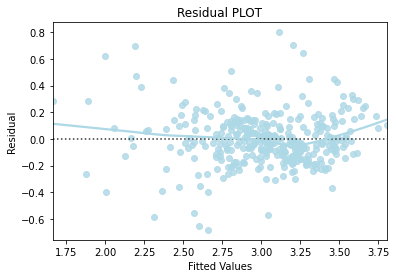

In [35]:
# predicted values
fitted = results2.fittedvalues
residua1 = results2.resid

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residua1, color="lightblue", lowess=True) #write your code here
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

**Observations:**
* Residuals are scattered about the mean of 0 in a random fashion, therefore the assumption of linearity is satisfied.

#### Normality of error terms
The residuals should be normally distributed.

<AxesSubplot:ylabel='Count'>

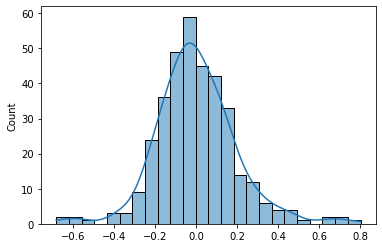

In [36]:
# Plot histogram of residuals
sns.histplot(residuals, kde=True)#write your code here

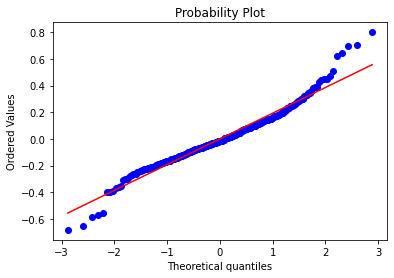

In [37]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

**Observations:**
* The assumption of normality is satisfied due to the normal distribution displayed from the histogram of the residuals.
* In addition the Q-Q plot of the quantiles of residuals plotted against each other shows a tight linear cluster.  This adds further support for satisfying the assumption of normality.

### Check the performance of the model on the train and test data set

In [38]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())

# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100

# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))

# Model Performance on test and train data
def model_pref(olsmodel, X_train, X_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(X_train)
    y_observed_train = Y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(X_test)
    y_observed_test = Y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(results2, X_train, X_test)  

    Data      RMSE       MAE      MAPE
0  Train  0.195504  0.143686  4.981813
1   Test  0.198045  0.151284  5.257965


**Observations:**

* These model performace values measure the overall difference between the predicted and observed in each model. 
* RMSE evaluates the square root of the standard deviation of the residuals.  
* MAE is the mean of the absolute errors of the residuals. 
* MAPE is the mean absolute percentage difference between the actual and predicted values.  
* The smaller these values the better the performance.  
* Overall comparison of these metrics indicate that the test data performed slightly less well than the train data as the values are slightly higher, however the performace is very similar.
* Our model performed similarly well on our test data as the model performed on our training data.  

#### Apply cross validation to improve the model and evaluate it using different evaluation metrics

In [39]:
# import the required function

from sklearn.model_selection import cross_val_score

# build the regression model and cross-validate
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train, Y_train, cv = 10) #write your code here
cv_Score12 = cross_val_score(linearregression, X_train, Y_train, cv = 10, scoring = 'neg_mean_squared_error') #write your code here                                


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.729 (+/- 0.232)
Mean Squared Error: 0.041 (+/- 0.023)


**Observations**
- The R-squared on the cross validation is 0.729, whereas on the training dataset it was 0.769
- And the MSE on cross validation is 0.041, whereas on the training dataset it was 0.038

We may want to reiterate the model building process again with new features or better feature engineering to increase the R-squared and decrease the MSE on cross validation.

In [40]:
#getting the coefficients from the model
model = sm.OLS(Y_train, X_train)
results = model.fit()
results.params
coef = results.params

# Create the pandas DataFrame
df_coef = pd.DataFrame(coef).reset_index()
df_coef.columns = ['Feature', 'Coeff']

# print dataframe.
df_coef


,Feature,Coeff
0,const,4.649386
1,CRIM,-0.012500
2,CHAS,0.119773
3,NOX,-1.056225
4,RM,0.058907
5,DIS,-0.044069
6,RAD,0.007848
7,PTRATIO,-0.048504
8,LSTAT,-0.029277


In [41]:
coef = list(results.params)
coef

[4.649385823266646,
 -0.012500455079103658,
 0.11977319077019757,
 -1.056225351668324,
 0.058906575109280324,
 -0.044068890799405194,
 0.007848474606243517,
 -0.04850362079499939,
 -0.02927704047979673]

In [42]:
param = df_coef["Feature"].tolist()
param

['const', 'CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']

In [43]:
# Let us write the equation of the fit
Equation = "log (Price) =" 
print(Equation, end='\t')
for i in range(len(coef)):
    print('(', coef[i], ') * ', param[i], '+', end = ' ')

log (Price) =	( 4.649385823266646 ) *  const + ( -0.012500455079103658 ) *  CRIM + ( 0.11977319077019757 ) *  CHAS + ( -1.056225351668324 ) *  NOX + ( 0.058906575109280324 ) *  RM + ( -0.044068890799405194 ) *  DIS + ( 0.007848474606243517 ) *  RAD + ( -0.04850362079499939 ) *  PTRATIO + ( -0.02927704047979673 ) *  LSTAT + 

**Conclusions**
* A linear regression model was developed from the data that was able to explain 76% of the variance in the MSRP of properties in this area.
* There were 8 parameters identified that significantly influence the price of properties in this Boston suburb/city.
* These indlude:
    * The crime rate.
    * Whether the property was adjacent to the Charles River.
    * The level of nitric oxides (smog) in the area.
    * The number of rooms per dwelling.
    * Distance to employment centers.
    * Index of accessibility to radial highways.
    * The pupil:teacher ratio of the schools in the area.
    * The socieoeconomic status of the individuals living in the area.
* The most influential parameter was NOX, with -1.056 coefficient.  This indicates that for every 1 increase in this parameter - this reduced the price of the property 1.056 times. This is logical as NOX is a measure of environmental smog.  
* The model was verfied on a separate testing data set and further cross validated.  
* All tests for underlying assumptions were met.

**Recommendations**
* In order to predict housing prices of this area it is recommended that attention be made to the above 8 parameters. 
* Although the model performed reasonably well, the model may be improved by exploring the combination of parameters, for example combining the product of CRIM and LSAT or NOX and RAD.  
* Overall the goal would be to reduce the number of parameters and increase the R-squared value.  
* This may result in better prediction of housing costs and greater ease of interpretation.  